In [61]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from io import BytesIO
from tabulate import tabulate

In [2]:
# Importar arquivos e criar os DFs
df_clientes = pd.read_excel('clientes.xlsx')
df_transacoes = pd.read_excel('transacoes02.xlsx')
df_campanhas = pd.read_excel('campanhas02.xlsx')

In [3]:
# Entendendo as bases de dados -- Comandos que irei usar

# shape -- quantidade de linhas e colunas
# dtypes -- tipos de dados das colunas
# isnull sum -- quantidade de valores nulos
# nunique(). sort_values -- valores distintos de cada coluna
# value_counts() em alguma coluna específica -- valores distintos

In [4]:
# Verificar tamanho (linhas x colunas)
print('LINHAS E COLUNAS')
print('Base CLIENTES -> ', df_clientes.shape)
print('Base TRANSAÇÕES -> ', df_transacoes.shape)
print('Base CAMPANHAS ->', df_campanhas.shape)

LINHAS E COLUNAS
Base CLIENTES ->  (38, 8)
Base TRANSAÇÕES ->  (36, 6)
Base CAMPANHAS -> (36, 6)


In [5]:
# BASE -- CLIENTES

# Vou usar o dtypes para ver os tipos de dados das colunas
df_clientes.dtypes

id_cooperado                int64
nome                       object
data_nascimento    datetime64[ns]
genero                     object
cidade                     object
estado                     object
data_adesao        datetime64[ns]
renda_estimada            float64
dtype: object

In [6]:
# BASE -- CLIENTES

# Vou usar o isnull() e o sum() para saber a quantidade de valores nulos
df_clientes.isnull().sum()

id_cooperado       0
nome               0
data_nascimento    0
genero             0
cidade             0
estado             0
data_adesao        0
renda_estimada     5
dtype: int64

In [7]:
# BASE -- CLIENTES

# Vou usar o nunique() para saber qtde de valores distintos de cada coluna
df_clientes.nunique().sort_values()

genero              7
cidade             11
estado             13
renda_estimada     31
id_cooperado       36
data_nascimento    36
data_adesao        36
nome               38
dtype: int64

In [8]:
# BASE -- CLIENTES

# Vou usar o value_counts() em colunas específicas para ver os valores distintos
df_clientes['estado'].value_counts()

estado
SP                7
SC                7
RJ                4
MG                4
PR                4
RS                3
Santa Catarina    2
sc                2
sp                1
pr                1
rj                1
rs                1
mg                1
Name: count, dtype: int64

In [9]:
# Tratamento --> BASE -- CLIENTES

# Encontrei 5 valores nulos na coluna 'renda_estimada'
# Solução --> Vou excluir linhas com renda_estimada null.
# Motivo --> Se eu substituir por zero, acredito que possa atrapalhar outros cálculos
# Por exemplo --> Se buscarmos a média da renda_estimada, os valores com zero vão mascarar o resultado.

# Removendo linhas com valores nulos
df_clientes = df_clientes.dropna(subset=['renda_estimada'])

In [10]:
# Tratamento --> BASE -- CLIENTES

# Encontrei valores duplicados (id 101: 2 ocorrências / id 113: 2 ocorrências)
# Percebi que os valores das outras colunas eram iguais.
# Então removi a duplicidade e deixei apenas 1 ocorrência de cada id que estava duplicado.

# Removendo linha repetida do id 113
df_clientes = df_clientes[~((df_clientes['id_cooperado']==113) & (df_clientes['genero'] == 'Masc'))]

# Removendo linha repetida do id 101
df_clientes = df_clientes[~((df_clientes['id_cooperado']==101) & (df_clientes['genero'] == 'M'))]

In [11]:
# Tratamento --> BASE -- CLIENTES

# Encontrei valores distintos na coluna 'genero' para representar a mesma coisa.
# Por exemplo, 'Masc' / 'Masculino' / 'masculino'
# Solução --> Padronização. Deixar tudo minúsculo e substituir valores pelo valor padrão.
# Por exemplo, 'masc' -> 'masculino' / 'M' -> 'masculino'
# Além disso, tem um valor com a letra 'o'. Verificando o nome, podemos ajustar para 'masculino'.

# Padronizando tudo minúsculo
df_clientes['genero'] = df_clientes['genero'].str.lower().str.strip()

# Substituindo letras por valores corretos
df_clientes['genero'] = df_clientes['genero'].replace({
    'm': 'masculino',
    'f': 'feminino',
    'o': 'masculino'
})

# Verificando a nvoa contagem distinta
df_clientes['genero'].value_counts()

genero
masculino    17
feminino     14
Name: count, dtype: int64

In [12]:
# Tratamento --> BASE -- CLIENTES

# Encontrei valores distintos na coluna 'cidade' para representar a mesma coisa.
# Por exemplo, 'Blumenau1' / 'S. Paulo' / 'São Paulo'
# Solução --> Padronização. Deixar tudo minúsculo e separado por "_"


# Deixando tudo minúsculo e separado por underline
df_clientes['cidade'] = df_clientes['cidade'].str.lower().str.strip().str.replace(' ', '_')

# Substituindo valores errados pelos corretos
df_clientes['cidade'] = df_clientes['cidade'].replace({'s._paulo': 'sao_paulo', 'blumenaul': 'blumenau', 'blumenau1': 'blumenau'})

# Verificando a nova contagem distinta
df_clientes['cidade'].value_counts()

cidade
blumenau          6
sao_paulo         6
rio_de_janeiro    4
belo_horizonte    4
curitiba          4
porto_alegre      4
florianopolis     3
Name: count, dtype: int64

In [13]:
# Tratamento --> BASE -- CLIENTES

# Encontrei valores distintos na coluna 'estado' para representar a mesma coisa.
# Por exemplo, 'sc' / 'SC' / 'SANTA CATARINA'
# Solução --> Padronização. Deixar tudo maiúsculo e apenas sigla (Ex. 'SC'/ 'SP')

# Deixando todos os valores maiúsculos
df_clientes['estado'] = df_clientes['estado'].str.upper().str.strip()

# Substituindo valor escrito completo pela sigla do estado
df_clientes['estado'] = df_clientes['estado'].replace({'SANTA CATARINA': 'SC'})

# Verificando a nvoa contagem distinta
df_clientes['estado'].value_counts()

estado
SC    9
SP    6
RJ    4
MG    4
PR    4
RS    4
Name: count, dtype: int64

In [14]:
# Tratamento --> BASE -- TRANSAÇÕES

# Verificar valores nulos
df_transacoes.isnull().sum()

# Encontrei 4 valores nulos na coluna 'valor'
# Solução: Se encontrar sinal que a transação é um brinde, bonificação, poderíamos substituir por 0.0

# Mas não é o caso, então, irei excluir linhas com esses valores nulos
df_transacoes = df_transacoes.dropna(subset=['valor'])

In [15]:
# Tratamento --> BASE -- TRANSAÇÕES

# Verificando valores da categoria_estabelecimento
# df_transacoes['categoria_estabelecimento'].value_counts()

# Podemos notar valores duplicados escritos de forma diferentes
# Por exemplo 'restaurante' / 'Rstaurante' / 'Combustível' / 'combustiveis'

# Padronizando valores todos minúsculos
df_transacoes['categoria_estabelecimento'] = df_transacoes['categoria_estabelecimento'].str.lower().str.strip()

# Substituindo valores pelo nome correto padrão
df_transacoes['categoria_estabelecimento'] = df_transacoes['categoria_estabelecimento'].replace({'servicos': 'serviços', 'alimentacao': 'alimentação', 'combustiveis': 'combustível'})

# Verificando contagem distinta dos valores ajustados
df_transacoes['categoria_estabelecimento'].value_counts()


categoria_estabelecimento
supermercado    6
restaurante     6
combustível     4
farmácia        3
vestuário       3
alimentação     3
serviços        2
lazer           2
transporte      1
viagem          1
eletrônicos     1
Name: count, dtype: int64

In [16]:
# Tratamento --> BASE -- CAMPANHAS

# Vou usar o nunique() para saber qtde de valores distintos de cada coluna
df_campanhas.nunique().sort_values()

acao               5
nome_campanha      6
canal              7
id_cooperado      28
data_interacao    30
id_interacao      36
dtype: int64

In [17]:
# Tratamento --> BASE -- CAMPANHAS

# Valores distintos da coluna 'acao'
df_campanhas['acao'].value_counts()

acao
Clicou                    11
Visualizou                11
Abriu                     10
Converteu                  3
Visualizou # Duplicata     1
Name: count, dtype: int64

In [18]:
# Tratamento --> BASE -- CAMPANHAS

# Para a base CAMPANHAS eu vou fazer diferente
# Vou padronizar o formato dos dados de três colunas de uma vês só
# Padronizando valores --> base Campanhas (tudo minúsculo)
# Colunas 'nome_campanha' e 'canal' os espaços serão substituídos por '_'
df_campanhas['acao'] = df_campanhas['acao'].str.lower().str.strip()
df_campanhas['nome_campanha'] = df_campanhas['nome_campanha'].str.lower().str.strip().str.replace(' ', '_')
df_campanhas['canal'] = df_campanhas['canal'].str.lower().str.strip().str.replace(' ', '_')

In [19]:
# Tratamento --> BASE -- CAMPANHAS

# Encontrei um "Visualizou # Duplicate" na coluna 'acao'
# Padronização: Vou ajustar para que fique apenas 'visualizou'
df_campanhas['acao'] = df_campanhas['acao'].replace({'visualizou # duplicata': 'visualizou'})

# Conferindo valores distintos
df_campanhas['acao'].value_counts()

acao
visualizou    12
clicou        11
abriu         10
converteu      3
Name: count, dtype: int64

In [20]:
# Tratamento --> BASE -- CAMPANHAS

# Aqui é só um comentário em relação a base CAMPANHAS.
# Percebi que a coluna 'nome_campanha' tinha duas formas distintas para cashback fim de ano.
# Mas ao ajustar para tudo minúsculo, o problema foi resolvido.
# Da mesma forma, a coluna 'canal' também tinha duas formas para EMAIL/email e SMS/sms.
# Ao ajustar para tudo minúsculo, o problema foi resolvido.

In [21]:
# VERIFICANDO BASE AJUSTADA -- CLIENTES
df_clientes.head()

,id_cooperado,nome,data_nascimento,genero,cidade,estado,data_adesao,renda_estimada
1,102,Maria Oliveira,1992-07-22,feminino,rio_de_janeiro,RJ,2018-05-10,4200.50
2,103,Carlos Pereira,1978-11-01,masculino,blumenau,SC,2010-02-15,7800.00
3,104,Ana Costa,1995-01-30,feminino,belo_horizonte,MG,2020-08-01,3100.75
4,105,Pedro Martins,1988-06-10,masculino,blumenau,SC,2016-11-25,6200.00
6,107,Lucas Santos,1983-04-18,masculino,curitiba,PR,2012-07-07,9500.00


In [22]:
# VERIFICANDO BASE AJUSTADA -- TRANSAÇÕES
df_transacoes.head()

,id_transacao,id_cooperado,data_transacao,valor,categoria_estabelecimento,nome_estabelecimento
0,1,101,2025-01-15 10:30:00,150.5,supermercado,Supermercado ABC
1,2,102,2025-01-16 12:45:10,85.0,restaurante,Restaurante Saboroso
2,3,103,2025-01-17 08:15:30,220.0,combustível,Posto XYZ
4,5,105,2025-01-19 14:20:45,55.8,farmácia,Drogaria Bem Estar
5,6,106,2025-01-20 11:00:55,350.0,vestuário,Loja de Roupas Elegante


In [23]:
# VERIFICANDO BASE AJUSTADA -- CAMPANHAS
df_campanhas.head()

,id_interacao,id_cooperado,nome_campanha,canal,data_interacao,acao
0,1001,101,cashback_fim_de_ano,email,2024-12-01,abriu
1,1002,102,seguro_premiado,sms,2024-12-05,clicou
2,1003,103,cashback_fim_de_ano,push_app,2024-12-02,visualizou
3,1004,105,investimento_facilitado,email,2024-12-10,abriu
4,1005,101,cashback_fim_de_ano,email,2024-12-08,clicou


In [24]:
# GERANDO ARQUIVOS CSV COM BASES AJUSTADAS

# O código abaixo está comentado, mas foi o código que usei para gerar os novos arquivos XLSX.
# Uma observação: Eu sei que daria pra exportar para CSV, mas perdeíamos o tipo datetime das colunas de datas.
# Pra isso, ao importar a nova base, seria preciso fazer uma transformação no tipo de dado das colunas de data.
# Isso seria feito -> df_clientes['data_adesao] = pd.to_datetime(df_clientes['data_adesao'])
# Mas optei por exportar os arquivos em XLSX, mantendo os formatos.

# Esses são os arquivos com as bases ajustadas

# df_clientes.to_excel('clientes_novo.xlsx', index=False)
# df_transacoes.to_excel('transacoes_novo.xlsx', index=False)
# df_campanhas.to_excel('campanhas_novo.xlsx', index=False)

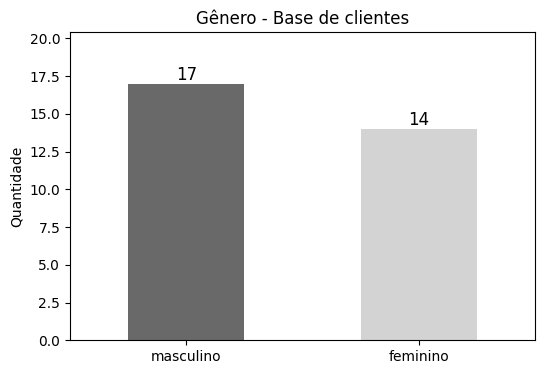

In [ ]:
# CRIANDO O RELATÓRIO DO PROCESSO DE LIMPEZA

# GRAFICO - GENERO BASE CLIENTES

contagem_genero = df_clientes['genero'].value_counts()

cores_genero = ['#696969', '#D3D3D3'] 
plt.figure(figsize=(6, 4))
barras_genero = contagem_genero.plot(kind='bar', color=cores_genero)
plt.title('Gênero - Base de clientes')
plt.xlabel('')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

for bar in barras_genero.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.ylim(0, contagem_genero.max() * 1.2)
plt.show()

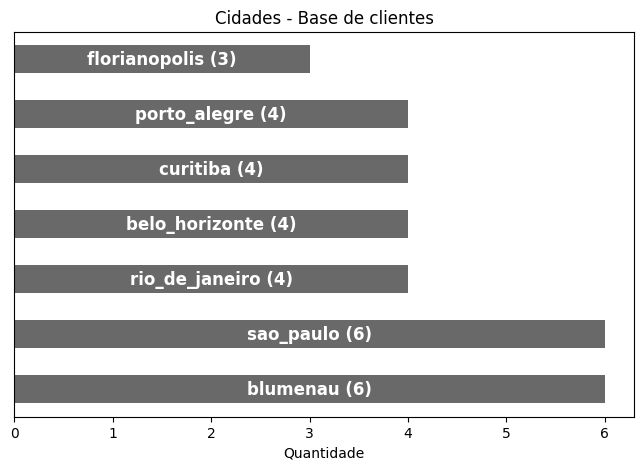

In [58]:
# GRAFICO - DISTRIBUIÇÃO CLIENTES - CIDADE

# contagem por cidade
contagem_cidade = df_clientes['cidade'].value_counts()
cores_cidade = ['#696969']

# Aqui vou criar um gráfico de barra horizontal
plt.figure(figsize=(8, 5))
barras_cidade = contagem_cidade.plot(kind='barh', color=cores_cidade[:len(contagem_cidade)])

plt.title('Cidades - Base de clientes')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.ylabel('')
plt.yticks([]) 

for bar, cidade, valor in zip(barras_cidade.patches, contagem_cidade.index, contagem_cidade.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{cidade} ({valor})',
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.show()

In [64]:
# GRAFICO - TRANSAÇÕES POR TIPO ESTABELECIMENTO

# contagem por cidade
contagem_transacoes_tipo = df_transacoes['categoria_estabelecimento'].value_counts().reset_index()
contagem_transacoes_tipo.columns = ['Tipo_estabelecimento', 'Quantidade']

# Exibindo a tabela formatada
print(tabulate(contagem_transacoes_tipo, headers='keys', tablefmt='grid'))



+----+------------------------+--------------+
|    | Tipo_estabelecimento   |   Quantidade |
+====+========================+==============+
|  0 | supermercado           |            6 |
+----+------------------------+--------------+
|  1 | restaurante            |            6 |
+----+------------------------+--------------+
|  2 | combustível            |            4 |
+----+------------------------+--------------+
|  3 | farmácia               |            3 |
+----+------------------------+--------------+
|  4 | vestuário              |            3 |
+----+------------------------+--------------+
|  5 | alimentação            |            3 |
+----+------------------------+--------------+
|  6 | serviços               |            2 |
+----+------------------------+--------------+
|  7 | lazer                  |            2 |
+----+------------------------+--------------+
|  8 | transporte             |            1 |
+----+------------------------+--------------+
|  9 | viagem